# Thực hiện KNN với dữ liệu môn "Quản lý lưu vực"

In [18]:
import pandas as pd

HM = pd.read_excel("Data\\DH22HM.xlsx")
HM["CK"] = HM["CK"].replace("V", "0").astype("float64")


DL = pd.read_excel("Data\\DH22DL.xlsx")
DL["CK"] = DL["CK"].replace("V", "0").astype("float64")
Data = pd.concat([HM, DL], ignore_index = True)
Data

,Mã SV,Mã lớp,Vắng mặt LT,CC_LT,Số bài TH,CC_TH,CC,GK,CK,TK10
0,22166003,DH22HM,0,10,5,10,10,7.5,8.2,8.4
1,22166002,DH22HM,1,8,3,6,7,4.8,7.9,7.1
2,22166004,DH22HM,1,8,4,8,8,3.8,5.3,5.5
3,22166006,DH22HM,0,10,5,10,10,7.9,7.0,7.8
4,22166007,DH22HM,0,10,5,10,10,5.6,4.5,5.8
...,...,...,...,...,...,...,...,...,...,...
109,22157062,DH22DL,0,10,4,8,9,6.7,6.2,6.9
110,22157063,DH22DL,0,10,5,10,10,8.2,2.6,5.2
111,22157065,DH22DL,1,8,0,0,4,2.0,3.0,3.0
112,22157067,DH22DL,1,8,5,10,9,0.0,4.4,4.4


In [19]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mã SV        114 non-null    int64  
 1   Mã lớp       114 non-null    object 
 2   Vắng mặt LT  114 non-null    int64  
 3   CC_LT        114 non-null    int64  
 4   Số bài TH    114 non-null    int64  
 5   CC_TH        114 non-null    int64  
 6   CC           114 non-null    int64  
 7   GK           114 non-null    float64
 8   CK           114 non-null    float64
 9   TK10         114 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 9.0+ KB


# Lấy các cột cần thiết

In [20]:
# Lấy cột CC

cc = Data["CC"]
cc

0      10
1       7
2       8
3      10
4      10
       ..
109     9
110    10
111     4
112     9
113    10
Name: CC, Length: 114, dtype: int64

In [21]:
# Lấy cột GK

gk = Data["GK"]
gk

0      7.5
1      4.8
2      3.8
3      7.9
4      5.6
      ... 
109    6.7
110    8.2
111    2.0
112    0.0
113    5.4
Name: GK, Length: 114, dtype: float64

In [22]:
# Lấy cột ck

ck = Data["CK"]
ck

0      8.2
1      7.9
2      5.3
3      7.0
4      4.5
      ... 
109    6.2
110    2.6
111    3.0
112    4.4
113    5.1
Name: CK, Length: 114, dtype: float64

In [67]:
gpa10 = cc * 0.2 + gk * 0.2 + ck * 0.6
gpa10

0      8.42
1      7.10
2      5.54
3      7.78
4      5.82
       ... 
109    6.86
110    5.20
111    3.00
112    4.44
113    6.14
Length: 114, dtype: float64

# Vẽ đồ thị để kiểm tra

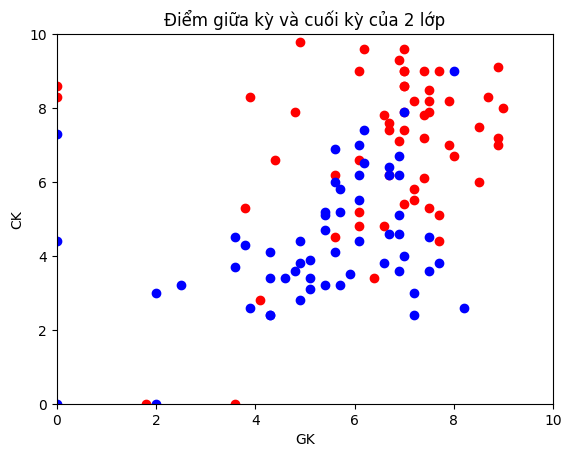

In [26]:
import matplotlib.pyplot as plt

plt.scatter(HM["GK"], HM["CK"], color = 'red', marker = "o", label = "DH22HM")
plt.scatter(DL["GK"], DL["CK"], color = 'blue', marker = "o", label = "DH22DL")

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel("GK")
plt.ylabel("CK")
plt.title("Điểm giữa kỳ và cuối kỳ của 2 lớp")
plt.show()

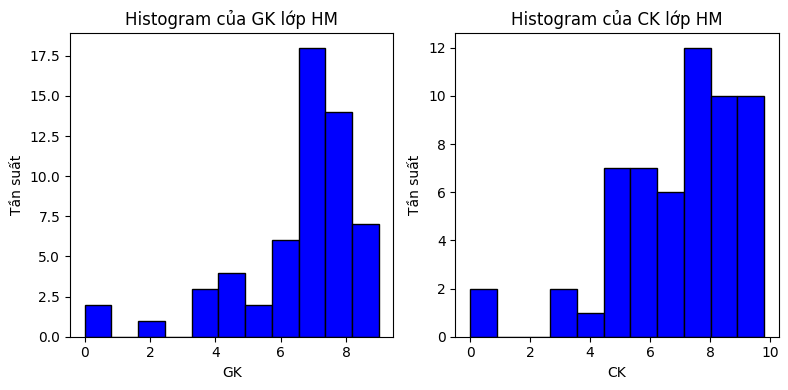

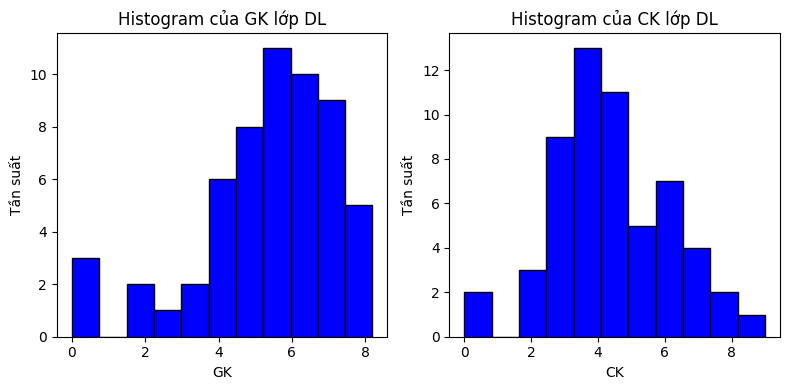

In [62]:
def draw_subplot(df: pd.DataFrame, cols: list, class_name : str):
    # Kiểm tra cột có tồn tại không
    for col in cols:
        if col not in df.columns:
            print("Không tồn tại cột", col)
            return

    num_cols = len(cols)  # Số cột biểu đồ sẽ bằng số cột cần vẽ

    # Tạo lưới subplot với một hàng và số cột cần vẽ
    fig, axes = plt.subplots(1, num_cols, figsize=(4 * num_cols, 4))

    # Kiểm tra nếu chỉ có một cột, axes sẽ là một đối tượng đơn
    if num_cols == 1:
        axes = [axes]

    for i in range(num_cols):
        # Vẽ histogram cho từng cột
        axes[i].hist(df[cols[i]].dropna(), bins=11, color='blue', edgecolor='black')
        axes[i].set_title(f'Histogram của {cols[i]} lớp {class_name}')
        axes[i].set_xlabel(cols[i])
        axes[i].set_ylabel('Tần suất')

    plt.tight_layout()  # Điều chỉnh khoảng cách giữa các subplot
    plt.show()

# Ví dụ gọi hàm
draw_subplot(HM, ['GK', 'CK'], "HM")
draw_subplot(DL, ['GK', 'CK'], "DL")

# Phân tích phổ điểm chung

In [66]:
print("HM CC Statistics:\n", HM['CC'].describe())
print("DL CC Statistics:\n", DL['CC'].describe())


HM CC Statistics:
 count    57.000000
mean      9.280702
std       1.708742
min       3.000000
25%      10.000000
50%      10.000000
75%      10.000000
max      10.000000
Name: CC, dtype: float64
DL CC Statistics:
 count    57.000000
mean      8.263158
std       2.364366
min       0.000000
25%       8.000000
50%       9.000000
75%      10.000000
max      10.000000
Name: CC, dtype: float64


In [63]:
import pandas as pd

# Tính toán các thống kê mô tả cho cột GK và CK của lớp HM và DL
print("HM GK:")
print(HM['GK'].describe())
print("HM CK:")
print(HM['CK'].describe())
print("DL GK:")
print(DL['GK'].describe())
print("DL CK:")
print(DL['CK'].describe())

# Tính toán skewness
from scipy.stats import skew

print("HM GK Skewness:", skew(HM['GK'].dropna()))
print("HM CK Skewness:", skew(HM['CK'].dropna()))
print("DL GK Skewness:", skew(DL['GK'].dropna()))
print("DL CK Skewness:", skew(DL['CK'].dropna()))


HM GK:
count    57.00000
mean      6.52807
std       1.91337
min       0.00000
25%       6.10000
50%       7.00000
75%       7.50000
max       9.00000
Name: GK, dtype: float64
HM CK:
count    57.000000
mean      6.940351
std       2.111098
min       0.000000
25%       5.800000
50%       7.400000
75%       8.300000
max       9.800000
Name: CK, dtype: float64
DL GK:
count    57.000000
mean      5.345614
std       1.884814
min       0.000000
25%       4.600000
50%       5.600000
75%       6.700000
max       8.200000
Name: GK, dtype: float64
DL CK:
count    57.000000
mean      4.414035
std       1.757681
min       0.000000
25%       3.400000
50%       4.100000
75%       5.500000
max       9.000000
Name: CK, dtype: float64
HM GK Skewness: -1.6947244175318021
HM CK Skewness: -1.3413853219253924
DL GK Skewness: -1.2125767744906146
DL CK Skewness: 0.14886211135268226


## Biểu đồ phân phối

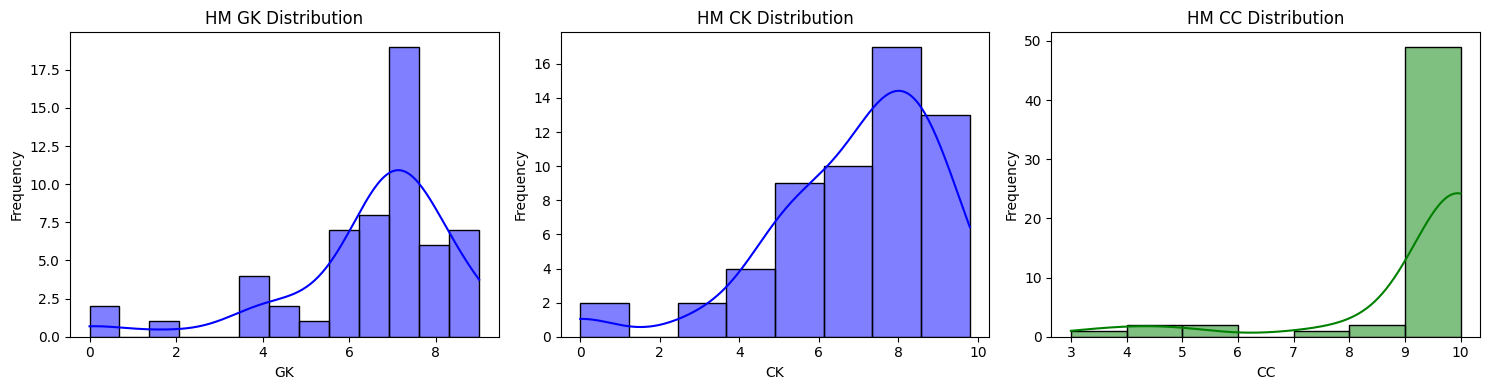

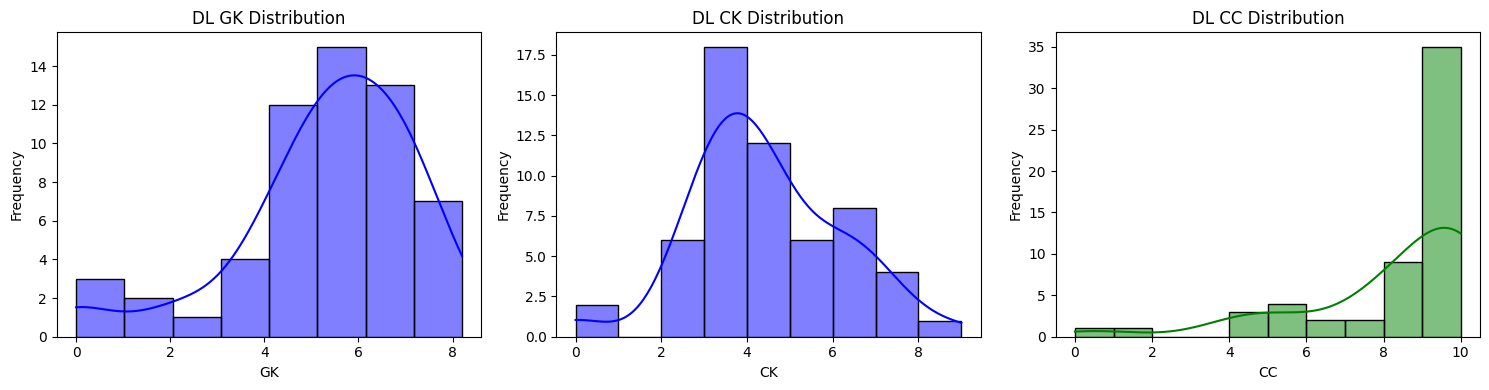

In [64]:
def plot_distributions_with_cc(df, cols, title_prefix):
    fig, axes = plt.subplots(1, len(cols) + 1, figsize=(5 * (len(cols) + 1), 4))
    
    if len(cols) == 1:
        axes = [axes]

    for i, col in enumerate(cols):
        sns.histplot(df[col], kde=True, ax=axes[i], color='blue')
        axes[i].set_title(f'{title_prefix} {col} Distribution')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    sns.histplot(df['CC'], kde=True, ax=axes[len(cols)], color='green')
    axes[len(cols)].set_title(f'{title_prefix} CC Distribution')
    axes[len(cols)].set_xlabel('CC')
    axes[len(cols)].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_distributions_with_cc(HM, ['GK', 'CK'], 'HM')
plot_distributions_with_cc(DL, ['GK', 'CK'], 'DL')


## Phân tích điểm tổng kết (GPA10)

In [82]:

# Tính GPA10 cho cả hai lớp
HM['GPA10'] = HM['CC'] * 0.2 + HM['GK'] * 0.2 + HM['CK'] * 0.6
DL['GPA10'] = DL['CC'] * 0.2 + DL['GK'] * 0.2 + DL['CK'] * 0.6

# Lấy các thống kê mô tả
hm_gpa_desc = HM['GPA10'].describe()
dl_gpa_desc = DL['GPA10'].describe()

# Tạo DataFrame cho các thống kê
gpa = pd.DataFrame(
    data = {
        'DH22HM': hm_gpa_desc,
        'DH22DL': dl_gpa_desc
    }
)

# Đặt tên chỉ mục cho DataFrame
gpa.index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

gpa

,DH22HM,DH22DL
count,57.000000,57.000000
mean,7.325965,5.370175
std,1.666339,1.527468
min,1.160000,0.400000
25%,6.680000,4.500000
50%,7.780000,5.340000
75%,8.560000,6.200000
max,9.240000,9.000000


#### Phân Tích và So Sánh
1. Trung Bình (Mean):
- DH22HM: 7.33
- DH22DL: 5.37
- Điểm GPA10 trung bình của lớp DH22HM cao hơn đáng kể so với lớp DH22DL, cho thấy lớp DH22HM có kết quả học tập tổng thể tốt hơn.


2. Độ Lệch Chuẩn (Std Dev):
- DH22HM: 1.67
- DH22DL: 1.53
- Độ lệch chuẩn của lớp DH22HM cao hơn một chút so với lớp DH22DL, cho thấy điểm GPA10 của lớp DH22HM phân tán rộng hơn.


3. Tối Thiểu và Tối Đa (Min & Max):
- DH22HM: Từ 1.16 đến 9.24
- DH22DL: Từ 0.40 đến 9.00
- Lớp DH22HM có phạm vi điểm rộng hơn so với lớp DH22DL, đặc biệt là điểm tối thiểu cao hơn.


4. Các Phân Vị (Percentiles):
- Điểm GPA10 ở các phân vị (25%, 50%, 75%) của lớp DH22HM cao hơn so với lớp DH22DL. Điều này cho thấy rằng lớp DH22HM không chỉ có điểm trung bình cao hơn mà cũng có điểm cao hơn ở các phần lớn của phân phối.


5. Giải Thích Sự Khác Biệt
- Lớp DH22HM: Điểm GPA10 cao hơn, độ lệch chuẩn cao hơn cho thấy có sự phân tán lớn hơn trong kết quả nhưng điểm trung bình và các phân vị cao hơn cho thấy lớp này có kết quả học tập tốt hơn tổng thể.
- Lớp DH22DL: Điểm GPA10 thấp hơn với phạm vi điểm nhỏ hơn và điểm tối thiểu thấp hơn cho thấy lớp này có sự phân bố điểm rộng hơn với nhiều học sinh có điểm thấp hơn.

# Thực hiện KNN với 4 cột dữ liệu

## Chuẩn bị dữ liệu

In [89]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame({
    'CC': cc,
    'GK': gk,
    'CK': ck
})
y = gpa10


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


## Kiểm tra tại k = ? thì điểm R^2 tối ưu nhất

In [95]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import cross_val_score

best_choice = (None, -np.inf)
for k in range(1, 31):
    knn = KNN(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv = 5, scoring = 'r2').mean()
    if scores > best_choice[1]:
        best_choice = (k, scores)

print(f"Số hàng xóm cho điểm tối ưu nhất: {best_choice[1]}, tại {best_choice[0]} điểm")

Số hàng xóm cho điểm tối ưu nhất: 0.9307799119995466, tại 5 điểm


## Tạo mô hình KNN

In [96]:
Main_KNN = KNN(n_neighbors = 5)
Main_KNN.fit(X_train, y_train)

KNeighborsRegressor()

## Dự đoán kết quả

In [98]:
Main_KNN.predict(X_test)

array([5.448, 7.508, 6.884, 7.756, 5.432, 6.096, 5.216, 4.836, 8.452,
       8.244, 5.512, 1.86 , 5.368, 5.656, 5.148, 8.84 , 4.824, 5.532,
       6.74 , 8.828, 4.612, 7.636, 7.056])

## Visualization kết quả của KNN

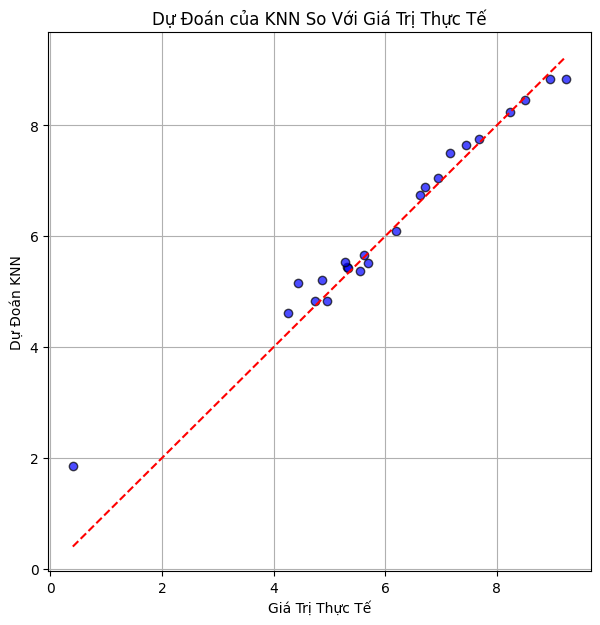

In [104]:
plt.figure(figsize=(7, 7))

# Biểu đồ phân tán dữ liệu thực và dự đoán
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Giá Trị Thực Tế')
plt.ylabel('Dự Đoán KNN')
plt.title('Dự Đoán của KNN So Với Giá Trị Thực Tế')
plt.grid(True)
plt.show()

## Đánh giá mô hình

In [101]:
from sklearn.metrics import r2_score

# Dự đoán trên tập kiểm tra
y_pred = Main_KNN.predict(X_test)

# Tính điểm R^2 cho dữ liệu kiểm tra
test_r2 = r2_score(y_test, y_pred)
print(f"Điểm R^2 trên tập kiểm tra: {test_r2:.4f}")

Điểm R^2 trên tập kiểm tra: 0.9571


## Biểu đồ phân tán 3D

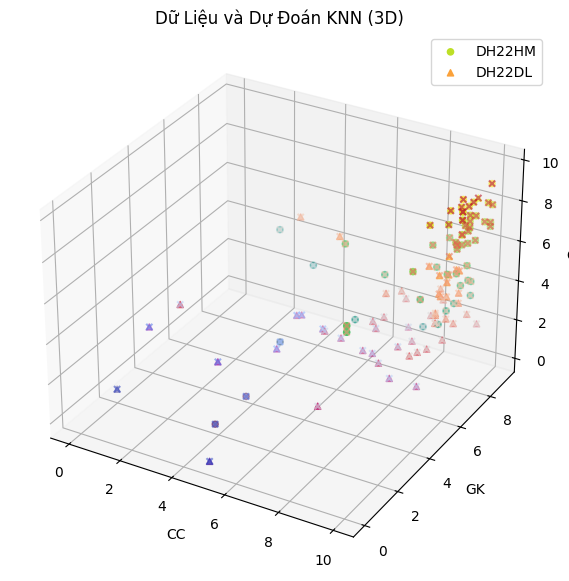

In [107]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')

# Vẽ dữ liệu thực tế
ax.scatter(HM['CC'], HM['GK'], HM['CK'], c=HM['GPA10'], cmap='viridis', label='DH22HM', marker='o')
ax.scatter(DL['CC'], DL['GK'], DL['CK'], c=DL['GPA10'], cmap='plasma', label='DH22DL', marker='^')

# Vẽ dự đoán
X_full = pd.concat([HM[['CC', 'GK', 'CK']], DL[['CC', 'GK', 'CK']]])
y_pred = Main_KNN.predict(X_full)
ax.scatter(X_full['CC'], X_full['GK'], X_full['CK'], c=y_pred, cmap='coolwarm', marker='x', alpha=0.6)

ax.set_xlabel('CC')
ax.set_ylabel('GK')
ax.set_zlabel('CK')
ax.set_title('Dữ Liệu và Dự Đoán KNN (3D)')
plt.legend()
plt.show()


## Biểu đồ phân tán với dự đoán

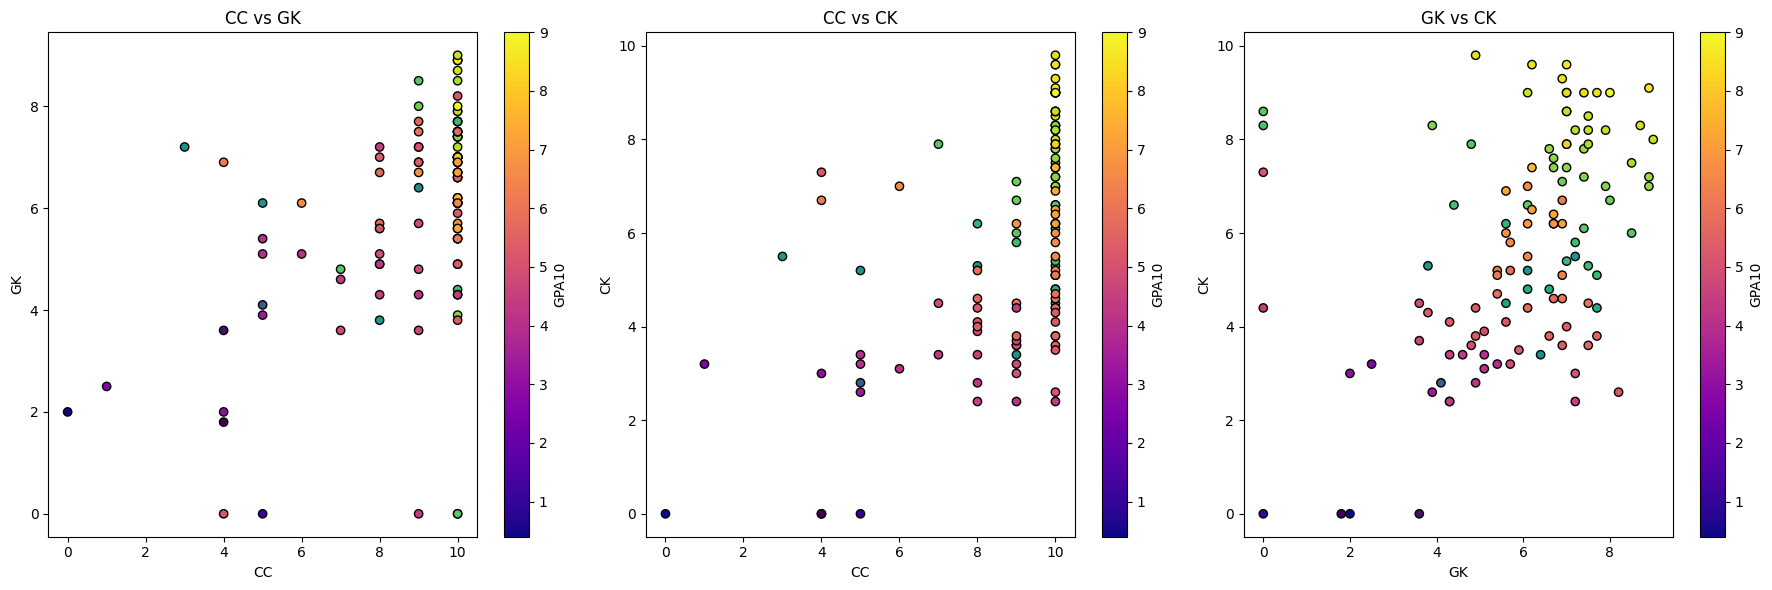

In [108]:
import seaborn as sns

plt.figure(figsize=(18, 6))

# Vẽ phân tán CC vs GK
plt.subplot(1, 3, 1)
plt.scatter(HM['CC'], HM['GK'], c=HM['GPA10'], cmap='viridis', label='DH22HM', edgecolor='k')
plt.scatter(DL['CC'], DL['GK'], c=DL['GPA10'], cmap='plasma', label='DH22DL', edgecolor='k')
plt.xlabel('CC')
plt.ylabel('GK')
plt.title('CC vs GK')
plt.colorbar(label='GPA10')

# Vẽ phân tán CC vs CK
plt.subplot(1, 3, 2)
plt.scatter(HM['CC'], HM['CK'], c=HM['GPA10'], cmap='viridis', label='DH22HM', edgecolor='k')
plt.scatter(DL['CC'], DL['CK'], c=DL['GPA10'], cmap='plasma', label='DH22DL', edgecolor='k')
plt.xlabel('CC')
plt.ylabel('CK')
plt.title('CC vs CK')
plt.colorbar(label='GPA10')

# Vẽ phân tán GK vs CK
plt.subplot(1, 3, 3)
plt.scatter(HM['GK'], HM['CK'], c=HM['GPA10'], cmap='viridis', label='DH22HM', edgecolor='k')
plt.scatter(DL['GK'], DL['CK'], c=DL['GPA10'], cmap='plasma', label='DH22DL', edgecolor='k')
plt.xlabel('GK')
plt.ylabel('CK')
plt.title('GK vs CK')
plt.colorbar(label='GPA10')

plt.tight_layout()
plt.show()


## Biểu đồ Residual

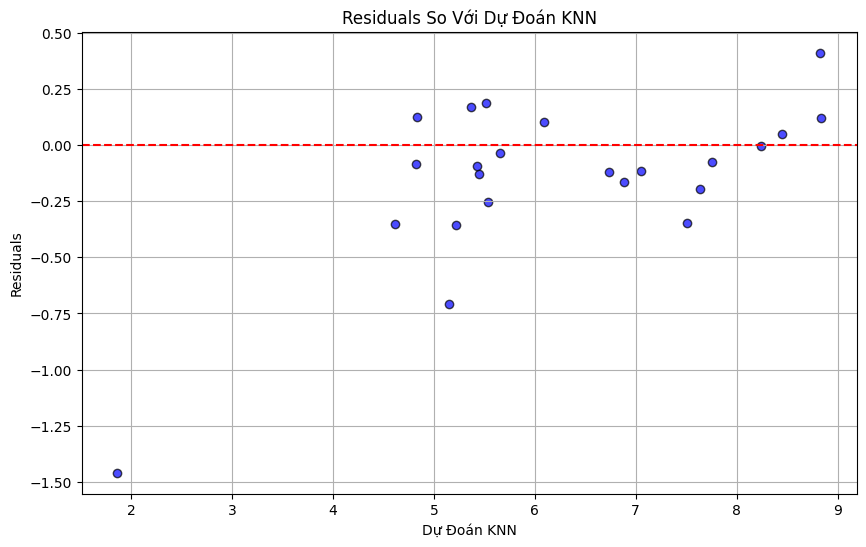

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Dự đoán trên tập kiểm tra
y_pred = Main_KNN.predict(X_test)

# Tính residuals
residuals = y_test - y_pred

# Vẽ residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Dự Đoán KNN')
plt.ylabel('Residuals')
plt.title('Residuals So Với Dự Đoán KNN')
plt.grid(True)
plt.show()
